# SIM_SACT_REGIMEN

I am going to open the cancer registration table "SIM_SACT_REGIMEN". This table contains RegimenID, benchmark group, mapped regimen,  chemoradiation exposure, intent of treatment, date of decision to treat, height and weight at start of regimen, clinical trial enrollment and start date of regimen.

Firstly, I am going to install the dependencies that are needed and then I am going to open the pickle file that I had saved in the previous notebook (which contains the tables "SIM_AV_PATIENT", "SIM_AV_TUMOUR", "SIM_SACT_PATIENT" and "SIM_SACT_TUMOUR"). Secondly, I am going to open the table "SIM_SACT_REGIMEN". The data frame saved in the pickle file will be defined as "df" and the table "SIM_SACT_REGIMEN" as "sim_sact_regimen".

In [1]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(7,5)})

In [2]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

In [3]:
zf = ZipFile('../Data/sim_sact_regimen.zip')
csv = zf.open('sim_sact_regimen.csv')
sim_sact_regimen = pd.read_csv(csv, encoding='latin1')
sim_sact_regimen.head()

,MERGED_REGIMEN_ID,MERGED_TUMOUR_ID,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,INTENT_OF_TREATMENT,DATE_DECISION_TO_TREAT,START_DATE_OF_REGIMEN,MAPPED_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,MERGED_PATIENT_ID,BENCHMARK_GROUP
0,10000001,10000001,-1.0,NaN,N,2015-03-08,2015-03-08,DEGARELIX,NaN,N,10000235,HORMONES
1,10000002,10000002,NaN,NaN,P,2016-07-09,2016-07-10,BICALUTAMIDE + GOSERELIN,NaN,N,10000315,HORMONES
2,10000003,10000003,NaN,NaN,P,2014-01-09,2014-01-09,EXEMESTANE,02,N,10000337,HORMONES
3,10000004,10000004,NaN,NaN,NaN,2015-03-17,2015-03-23,Rituximab,N,NaN,10000480,RITUXIMAB
4,10000005,10000005,0.0,NaN,C,2012-12-30,2013-03-11,Hydroxycarbamide,N,N,10000533,HYDROXYCARBAMIDE


Now I am going to explore some characteristics of the table and check if there are duplicate entries.

In [4]:
sim_sact_regimen.shape

(471919, 12)

In [5]:
sim_sact_regimen.isna().sum()

MERGED_REGIMEN_ID                  0
MERGED_TUMOUR_ID                   0
HEIGHT_AT_START_OF_REGIMEN    129514
WEIGHT_AT_START_OF_REGIMEN    129341
INTENT_OF_TREATMENT            62503
DATE_DECISION_TO_TREAT         60416
START_DATE_OF_REGIMEN              0
MAPPED_REGIMEN                  2371
CLINICAL_TRIAL                 61941
CHEMO_RADIATION               103648
MERGED_PATIENT_ID                  0
BENCHMARK_GROUP                    0
dtype: int64

In [6]:
sim_sact_regimen.dtypes

MERGED_REGIMEN_ID               int64
MERGED_TUMOUR_ID                int64
HEIGHT_AT_START_OF_REGIMEN    float64
WEIGHT_AT_START_OF_REGIMEN    float64
INTENT_OF_TREATMENT            object
DATE_DECISION_TO_TREAT         object
START_DATE_OF_REGIMEN          object
MAPPED_REGIMEN                 object
CLINICAL_TRIAL                 object
CHEMO_RADIATION                object
MERGED_PATIENT_ID               int64
BENCHMARK_GROUP                object
dtype: object

In [7]:
print(f'The original dataset has data for {len(sim_sact_regimen)} patients')
print(f'After removing duplicate entries, the dataset has data for {len(sim_sact_regimen.drop_duplicates())} patients')

The original dataset has data for 471919 patients
After removing duplicate entries, the dataset has data for 471919 patients


As we can see, there are no duplicate entries. Now I am going to select the variables that are more relevant.

In [8]:
sim_sact_regimen.columns

Index(['MERGED_REGIMEN_ID', 'MERGED_TUMOUR_ID', 'HEIGHT_AT_START_OF_REGIMEN',
       'WEIGHT_AT_START_OF_REGIMEN', 'INTENT_OF_TREATMENT',
       'DATE_DECISION_TO_TREAT', 'START_DATE_OF_REGIMEN', 'MAPPED_REGIMEN',
       'CLINICAL_TRIAL', 'CHEMO_RADIATION', 'MERGED_PATIENT_ID',
       'BENCHMARK_GROUP'],
      dtype='object')

In [9]:
columns_selected = ['MERGED_REGIMEN_ID', 'MERGED_TUMOUR_ID', 'HEIGHT_AT_START_OF_REGIMEN',
       'WEIGHT_AT_START_OF_REGIMEN', 'INTENT_OF_TREATMENT', 'START_DATE_OF_REGIMEN',
       'CLINICAL_TRIAL', 'CHEMO_RADIATION', 'MERGED_PATIENT_ID', 'BENCHMARK_GROUP']

In [10]:
sim_sact_regimen = sim_sact_regimen[columns_selected]
sim_sact_regimen.head()

,MERGED_REGIMEN_ID,MERGED_TUMOUR_ID,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,INTENT_OF_TREATMENT,START_DATE_OF_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,MERGED_PATIENT_ID,BENCHMARK_GROUP
0,10000001,10000001,-1.0,NaN,N,2015-03-08,NaN,N,10000235,HORMONES
1,10000002,10000002,NaN,NaN,P,2016-07-10,NaN,N,10000315,HORMONES
2,10000003,10000003,NaN,NaN,P,2014-01-09,02,N,10000337,HORMONES
3,10000004,10000004,NaN,NaN,NaN,2015-03-23,N,NaN,10000480,RITUXIMAB
4,10000005,10000005,0.0,NaN,C,2013-03-11,N,N,10000533,HYDROXYCARBAMIDE


Now I am going to open de pickle file I had saved in the previous notebook and merge it with the table "SIM_SACT_REGIMEN".

In [11]:
df = pd.read_pickle('./Data/avpat_avtum_sactpat_sacttum.pickle')
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,T,N,M,STAGE,GRADE_2,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG,DEPR,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAGNOSISDATEBEST,MERGED_PATIENT_ID,LINK_NUMBER,MERGED_TUMOUR_ID
0,10001000,F,810001000,White British,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,0.0,0.0,3.0,2.0,79.0,0,1,0,0,0,0,0,0,0,0,0,2.0,4.0,3.857711,120.0,2013-03-07,10001000.0,810001000.0,10002223.0
1,10001000,F,810001000,White British,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,0.0,0.0,3.0,2.0,79.0,0,1,0,0,0,0,0,0,0,0,0,2.0,4.0,3.857711,120.0,2013-03-07,10001000.0,810001000.0,10005351.0
2,10001128,F,810001128,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,0.0,0.0,3.0,2.0,86.0,0,0,1,0,0,0,0,0,0,0,0,0.0,1.0,2.234132,0.0,2014-10-23,NaN,NaN,NaN
3,10001482,F,810001482,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.0,0.0,0.0,3.0,2.0,77.0,1,0,0,0,0,0,0,0,0,1,0,0.0,3.0,3.022649,0.0,2014-01-08,10001482.0,810001482.0,10005354.0
4,10001482,F,810001482,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.0,0.0,0.0,3.0,2.0,77.0,1,0,0,0,0,0,0,0,0,1,0,0.0,3.0,3.022649,0.0,2014-01-08,10001482.0,810001482.0,10010150.0


In [12]:
df.shape

(38485, 47)

In [13]:
df = df.merge(sim_sact_regimen, left_on='MERGED_TUMOUR_ID', right_on='MERGED_TUMOUR_ID', how='left')
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,T,N,M,STAGE,GRADE_2,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG,DEPR,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAGNOSISDATEBEST,MERGED_PATIENT_ID_x,LINK_NUMBER,MERGED_TUMOUR_ID,MERGED_REGIMEN_ID,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,INTENT_OF_TREATMENT,START_DATE_OF_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,MERGED_PATIENT_ID_y,BENCHMARK_GROUP
0,10001000,F,810001000,White British,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,0.0,0.0,3.0,2.0,79.0,0,1,0,0,0,0,0,0,0,0,0,2.0,4.0,3.857711,120.0,2013-03-07,10001000.0,810001000.0,10002223.0,10003950.0,NaN,65.5,NaN,2013-03-19,N,NaN,10001000.0,TRIAL
1,10001000,F,810001000,White British,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,0.0,0.0,3.0,2.0,79.0,0,1,0,0,0,0,0,0,0,0,0,2.0,4.0,3.857711,120.0,2013-03-07,10001000.0,810001000.0,10005351.0,10009879.0,1.80,70.0,NaN,2015-09-26,02,N,10001000.0,NOT CHEMO
2,10001128,F,810001128,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,0.0,0.0,3.0,2.0,86.0,0,0,1,0,0,0,0,0,0,0,0,0.0,1.0,2.234132,0.0,2014-10-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001482,F,810001482,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.0,0.0,0.0,3.0,2.0,77.0,1,0,0,0,0,0,0,0,0,1,0,0.0,3.0,3.022649,0.0,2014-01-08,10001482.0,810001482.0,10005354.0,10011398.0,NaN,75.3,P,2015-11-23,02,NaN,10001482.0,BORTEZOMIB
4,10001482,F,810001482,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.0,0.0,0.0,3.0,2.0,77.0,1,0,0,0,0,0,0,0,0,1,0,0.0,3.0,3.022649,0.0,2014-01-08,10001482.0,810001482.0,10010150.0,10007977.0,1.56,NaN,NaN,2014-07-18,N,NaN,10001482.0,DOCETAXEL


In [14]:
df.isna().sum()

PATIENTID                         0
SEX                               0
LINKNUMBER                        0
ETHNICITY                      2663
NEWVITALSTATUS                    0
NUMBER_TUMOURS                    0
C180                              0
C181                              0
C182                              0
C183                              0
C184                              0
C185                              0
C186                              0
C187                              0
C188                              0
BEH_BENIGN                        0
BEH_MALIG                         0
BEH_MICINV                        0
BEH_INSITU                        0
BEH_UNCERT                        0
BEH_MALIG_METAS                   0
BEH_MALIG_UNCERT                  0
T                                 0
N                                 0
M                                 0
STAGE                             0
GRADE_2                           0
AGE_MEDIAN                  

In [15]:
df.shape

(45415, 56)

Now I am going to explore each variable separately. If necessary, variables will be recoded. 

As part of this exploratory analysis, I am also going to create plots to show the distribution of each variable. 

In [16]:
df['HEIGHT_AT_START_OF_REGIMEN'].describe()

count    15231.000000
mean         1.626701
std          0.337132
min         -1.000000
25%          1.600000
50%          1.680000
75%          1.750000
max          2.100000
Name: HEIGHT_AT_START_OF_REGIMEN, dtype: float64

/home/elsa/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/elsa/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


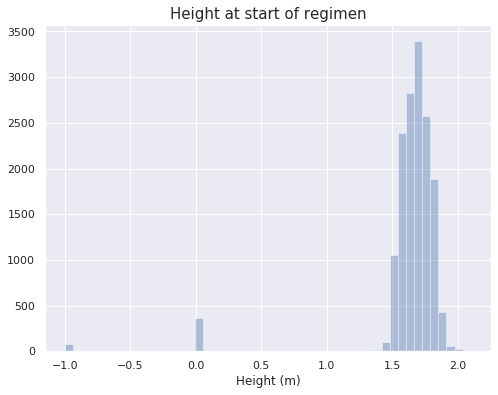

In [17]:
ax = sns.distplot(df['HEIGHT_AT_START_OF_REGIMEN'], hist=True, kde=False, bins=50)
plt.gcf().set_size_inches(8,6)
ax.set_title('Height at start of regimen', fontsize=15)
ax.set_xlabel('Height (m)', fontsize=12);

In [18]:
df['HEIGHT_AT_START_OF_REGIMEN'].unique()

array([  nan,  1.8 ,  1.56,  1.78,  1.63,  1.57,  1.77,  1.65,  1.87,
        0.  , -1.  ,  1.73,  1.59,  1.68,  1.52,  1.6 ,  1.69,  1.74,
        1.83,  1.55,  1.71,  1.84,  1.7 ,  1.53,  1.67,  1.75,  1.61,
        1.72,  1.5 ,  1.48,  1.76,  1.64,  1.58,  1.66,  1.51,  1.49,
        1.85,  1.46,  1.79,  1.62,  1.82,  1.81,  1.54,  1.44,  1.86,
        1.45,  0.79,  1.88,  0.01,  1.47,  1.9 ,  0.02,  1.92,  1.91,
        1.93,  0.65,  1.89,  1.4 ,  1.31,  1.43,  0.61,  1.42,  1.94,
        1.15,  0.73,  1.98,  1.41,  2.  ,  1.95,  1.96,  0.74,  1.1 ,
        0.7 ,  1.16,  1.04,  2.04,  0.8 ,  2.1 ,  1.13,  0.48])

The values that are extremely low will be removed (eg, 0, -1).

In [19]:
def height(value):
    if value < 0.7:
        return np.nan
    else:
        return value
df['HEIGHT_AT_START_OF_REGIMEN'] = df['HEIGHT_AT_START_OF_REGIMEN'].apply(height)    
df['HEIGHT_AT_START_OF_REGIMEN'].unique()

array([ nan, 1.8 , 1.56, 1.78, 1.63, 1.57, 1.77, 1.65, 1.87, 1.73, 1.59,
       1.68, 1.52, 1.6 , 1.69, 1.74, 1.83, 1.55, 1.71, 1.84, 1.7 , 1.53,
       1.67, 1.75, 1.61, 1.72, 1.5 , 1.48, 1.76, 1.64, 1.58, 1.66, 1.51,
       1.49, 1.85, 1.46, 1.79, 1.62, 1.82, 1.81, 1.54, 1.44, 1.86, 1.45,
       0.79, 1.88, 1.47, 1.9 , 1.92, 1.91, 1.93, 1.89, 1.4 , 1.31, 1.43,
       1.42, 1.94, 1.15, 0.73, 1.98, 1.41, 2.  , 1.95, 1.96, 0.74, 1.1 ,
       0.7 , 1.16, 1.04, 2.04, 0.8 , 2.1 , 1.13])

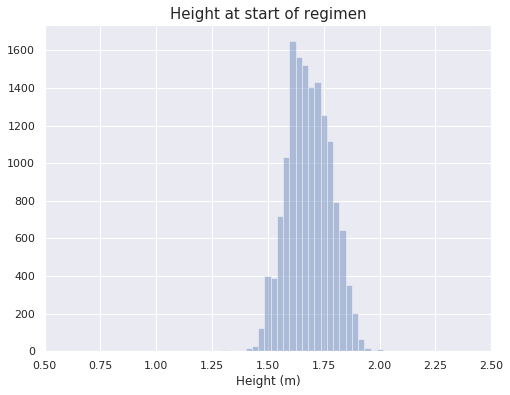

In [20]:
ax = sns.distplot(df['HEIGHT_AT_START_OF_REGIMEN'], hist=True, kde=False, bins=50)
plt.gcf().set_size_inches(8,6)
ax.set_title('Height at start of regimen', fontsize=15)
ax.set_xlabel('Height (m)', fontsize=12)
plt.xlim(0.5,2.5);

Since the height of the patient might be different for each tumour of the patient and the final objetive is to have only one row per patient, I am going to create a variable with the median height of the patient.

In [21]:
df['HEIGHT'] = df.groupby('PATIENTID')['HEIGHT_AT_START_OF_REGIMEN'].transform(lambda x: x.median())

In [22]:
df[['PATIENTID','HEIGHT_AT_START_OF_REGIMEN','HEIGHT']].sort_values(by='PATIENTID', ascending=False).head(10)

,PATIENTID,HEIGHT_AT_START_OF_REGIMEN,HEIGHT
33935,220045649,NaN,NaN
33934,220045089,NaN,NaN
33933,220045082,NaN,NaN
33932,220043390,NaN,1.82
33931,220043390,1.82,1.82
33930,220043390,NaN,1.82
33929,220043390,NaN,1.82
33928,220043175,NaN,NaN
33927,220041276,1.80,1.75
33926,220041276,1.75,1.75


In [23]:
df['HEIGHT'].describe()

count    18210.000000
mean         1.682314
std          0.072519
min          1.210000
25%          1.635000
50%          1.680000
75%          1.730000
max          2.040000
Name: HEIGHT, dtype: float64

Missing values will be filled with the median height.

In [24]:
df['HEIGHT'] = df['HEIGHT'].fillna(df['HEIGHT'].median())
df['HEIGHT'].describe()

count    45415.000000
mean         1.680928
std          0.045934
min          1.210000
25%          1.680000
50%          1.680000
75%          1.680000
max          2.040000
Name: HEIGHT, dtype: float64

In [25]:
df['HEIGHT'].isna().sum()

0

In [26]:
df['WEIGHT_AT_START_OF_REGIMEN'].describe()

count    14895.000000
mean        73.587582
std         19.844696
min         -1.000000
25%         62.300000
50%         73.200000
75%         84.625000
max        217.400000
Name: WEIGHT_AT_START_OF_REGIMEN, dtype: float64

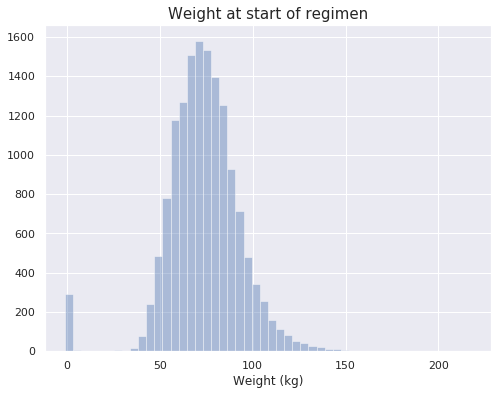

In [27]:
ax = sns.distplot(df['WEIGHT_AT_START_OF_REGIMEN'], hist=True, kde=False, bins=50)
plt.gcf().set_size_inches(8,6)
ax.set_title('Weight at start of regimen', fontsize=15)
ax.set_xlabel('Weight (kg)', fontsize=12);

Extremely low or high values will be removed.

In [28]:
def weight(value):
    if value < 10 or value >= 350:
        return np.nan
    else:
        return value
df['WEIGHT_AT_START_OF_REGIMEN'] = df['WEIGHT_AT_START_OF_REGIMEN'].apply(weight)    
df['WEIGHT_AT_START_OF_REGIMEN'].sort_values(ascending=False).head(20)

16043    217.4
37771    217.4
12543    204.8
25632    181.7
31191    178.0
18310    178.0
24598    161.5
5698     161.5
21931    157.0
16869    157.0
38899    156.0
19488    156.0
36639    154.0
12353    151.0
36099    148.8
28891    148.8
2891     148.8
21402    148.8
40973    148.0
22315    148.0
Name: WEIGHT_AT_START_OF_REGIMEN, dtype: float64

In [29]:
df['WEIGHT_AT_START_OF_REGIMEN'].sort_values().head(20)

32874    13.30
33799    17.00
45356    17.60
1099     20.00
32745    27.10
31402    27.30
32395    27.30
31591    27.30
23014    27.30
32740    28.10
32675    32.75
30931    32.80
44530    32.80
13070    33.30
29908    34.30
40338    34.40
19818    34.40
4344     34.60
39193    34.70
10833    34.80
Name: WEIGHT_AT_START_OF_REGIMEN, dtype: float64

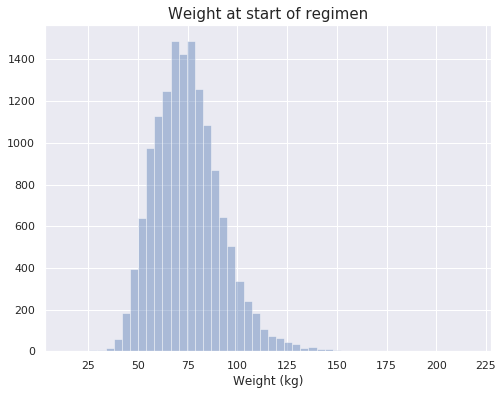

In [30]:
ax = sns.distplot(df['WEIGHT_AT_START_OF_REGIMEN'], hist=True, kde=False, bins=50)
plt.gcf().set_size_inches(8,6)
ax.set_title('Weight at start of regimen', fontsize=15)
ax.set_xlabel('Weight (kg)', fontsize=12);

Since the weight of the patient might be different for each tumour of the patient and the final objetive is to have only one row per patient, I am going to create a variable with the median weight of the patient.

In [31]:
df['WEIGHT'] = df.groupby('PATIENTID')['WEIGHT_AT_START_OF_REGIMEN'].transform(lambda x: x.median())

In [32]:
df[['PATIENTID','WEIGHT_AT_START_OF_REGIMEN','WEIGHT']].sort_values(by='PATIENTID', ascending=False).head(10)

,PATIENTID,WEIGHT_AT_START_OF_REGIMEN,WEIGHT
33935,220045649,NaN,NaN
33934,220045089,NaN,NaN
33933,220045082,NaN,NaN
33932,220043390,55.0,70.00
33931,220043390,83.0,70.00
33930,220043390,84.1,70.00
33929,220043390,57.0,70.00
33928,220043175,NaN,NaN
33927,220041276,78.0,73.25
33926,220041276,NaN,73.25


In [33]:
df['WEIGHT'].describe()

count    18166.000000
mean        74.617003
std         12.128821
min         33.300000
25%         66.850000
50%         74.000000
75%         81.250000
max        157.000000
Name: WEIGHT, dtype: float64

Missing values will be filled with the median weight.

In [34]:
df['WEIGHT'] = df['WEIGHT'].fillna(df['WEIGHT'].median())
df['WEIGHT'].describe()

count    45415.000000
mean        74.246801
std          7.676767
min         33.300000
25%         74.000000
50%         74.000000
75%         74.000000
max        157.000000
Name: WEIGHT, dtype: float64

In [35]:
df['WEIGHT'].isna().sum()

0

Body Mass Index (BMI) is more commonly used that height or weight. Therefore, BMI will be calculated and used in the analysis instead of height and weight.

In [36]:
df['BMI'] = df.WEIGHT / ((df.HEIGHT) ** 2)
df[['PATIENTID', 'WEIGHT', 'HEIGHT', 'BMI']].head(10)

,PATIENTID,WEIGHT,HEIGHT,BMI
0,10001000,67.75,1.80,20.910494
1,10001000,67.75,1.80,20.910494
2,10001128,74.00,1.68,26.218821
3,10001482,90.15,1.63,33.930521
4,10001482,90.15,1.63,33.930521
5,10001482,90.15,1.63,33.930521
6,10001482,90.15,1.63,33.930521
7,10001901,74.00,1.68,26.218821
8,10002351,74.00,1.68,26.218821
9,10002391,74.00,1.68,26.218821


In [37]:
df['BMI'].describe()

count    45415.000000
mean        26.313575
std          2.900986
min         10.563941
25%         26.218821
50%         26.218821
75%         26.218821
max         62.180424
Name: BMI, dtype: float64

In [38]:
df['BMI'].sort_values(ascending=False).head(20)

16044    62.180424
16043    62.180424
40593    56.712963
18298    54.421769
37771    53.669691
37774    53.669691
37773    53.669691
37772    53.669691
37770    53.669691
35950    52.171107
16869    51.856256
14130    51.704973
2890     51.487889
2891     51.487889
44995    50.131492
43266    49.609375
26792    49.216479
6873     49.142574
32278    48.425654
32277    48.425654
Name: BMI, dtype: float64

In [39]:
df['BMI'].sort_values().head(20)

10833    10.563941
10832    10.563941
13070    11.940191
32104    12.000000
32105    12.000000
2205     12.332128
32410    13.180272
19728    13.192779
24987    13.487020
42666    13.580247
42665    13.580247
31710    13.747166
33031    13.878744
45149    13.924320
10907    13.981481
10905    13.981481
10908    13.981481
10906    13.981481
43146    14.044496
32158    14.325069
Name: BMI, dtype: float64

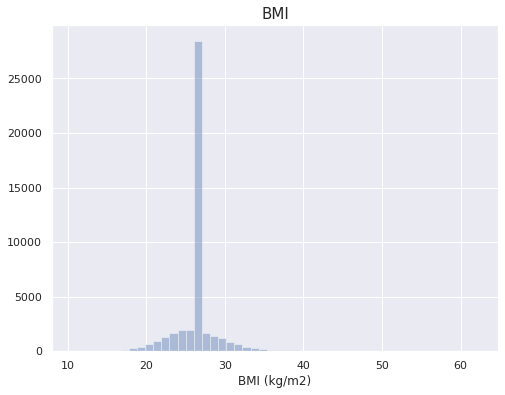

In [40]:
ax = sns.distplot(df['BMI'], hist=True, kde=False, bins=50)
plt.gcf().set_size_inches(8,6)
ax.set_title('BMI', fontsize=15)
ax.set_xlabel('BMI (kg/m2)', fontsize=12);

Extremely low or high values will be removed.

In [41]:
def bmi(value):
    if value < 10 or value > 70:
        return np.nan
    else:
        return value
df['BMI'] = df['BMI'].apply(bmi)    
df['BMI'].sort_values(ascending=False).head(20)

16044    62.180424
16043    62.180424
40593    56.712963
18298    54.421769
37771    53.669691
37774    53.669691
37773    53.669691
37772    53.669691
37770    53.669691
35950    52.171107
16869    51.856256
14130    51.704973
2890     51.487889
2891     51.487889
44995    50.131492
43266    49.609375
26792    49.216479
6873     49.142574
32278    48.425654
32277    48.425654
Name: BMI, dtype: float64

In [42]:
df['BMI'].sort_values().head(20)

10833    10.563941
10832    10.563941
13070    11.940191
32104    12.000000
32105    12.000000
2205     12.332128
32410    13.180272
19728    13.192779
24987    13.487020
42666    13.580247
42665    13.580247
31710    13.747166
33031    13.878744
45149    13.924320
10907    13.981481
10905    13.981481
10908    13.981481
10906    13.981481
43146    14.044496
32158    14.325069
Name: BMI, dtype: float64

In [43]:
df[['PATIENTID','HEIGHT','WEIGHT','BMI']].sort_values(by='BMI',ascending=False).head(10)

,PATIENTID,HEIGHT,WEIGHT,BMI
16043,60031006,1.48,136.20,62.180424
16044,60031006,1.48,136.20,62.180424
40593,60038107,1.44,117.60,56.712963
18298,60035833,1.47,117.60,54.421769
37771,60021426,1.64,144.35,53.669691
37772,60021426,1.64,144.35,53.669691
37773,60021426,1.64,144.35,53.669691
37774,60021426,1.64,144.35,53.669691
37770,60021426,1.64,144.35,53.669691
35950,60010603,1.67,145.50,52.171107


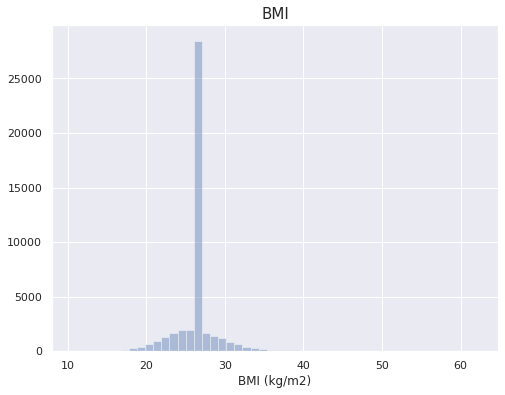

In [44]:
ax = sns.distplot(df['BMI'], hist=True, kde=False, bins=50)
plt.gcf().set_size_inches(8,6)
ax.set_title('BMI', fontsize=15)
ax.set_xlabel('BMI (kg/m2)', fontsize=12);

In [45]:
df['BMI'].describe()

count    45415.000000
mean        26.313575
std          2.900986
min         10.563941
25%         26.218821
50%         26.218821
75%         26.218821
max         62.180424
Name: BMI, dtype: float64

In [46]:
df['BMI'].isna().sum()

0

In [47]:
df = df.drop(['HEIGHT_AT_START_OF_REGIMEN','WEIGHT_AT_START_OF_REGIMEN'], axis=1)

In [48]:
df['INTENT_OF_TREATMENT'].value_counts()

P    8339
A    5380
9    1157
N     920
C     668
D     261
U      30
4      20
1      19
R       8
a       7
2       5
3       4
p       4
5       1
c       1
Name: INTENT_OF_TREATMENT, dtype: int64

In [49]:
df['INTENT_OF_TREATMENT'] = df['INTENT_OF_TREATMENT'].astype(str)
def intent(value):
    if value == '1' or value == 'C' or value == 'c':
        return 'Curative'
    elif value == '2' or value == 'P' or value == 'p':
        return 'Palliative'
    elif value == '3':
        return 'Disease modification'
    elif value == '4' or value == 'D':
        return 'Diagnostic'
    elif value == '5':
        return 'Staging'
    elif value == '4' or value == 'D':
        return 'Diagnostic'
    elif value == 'A' or value == 'a':
        return 'Adjuvant'
    elif value == 'N':
        return 'Neoadjuvant'
    elif value == '9' or value == 'R' or value == 'U' or value == '?' or value == 'T' or value == 'nan':
        return np.nan
    else:
        return value
df['INTENT_OF_TREATMENT'] = df['INTENT_OF_TREATMENT'].apply(intent)    
df['INTENT_OF_TREATMENT'].value_counts()

Palliative              8348
Adjuvant                5387
Neoadjuvant              920
Curative                 688
Diagnostic               281
Disease modification       4
Staging                    1
Name: INTENT_OF_TREATMENT, dtype: int64

Note: further details about the classification of this variable can be found here: https://www.datadictionary.nhs.uk/data_dictionary/attributes/c/cancer_treatment_intent_de.asp?shownav=1. 9, R, U, ? and T are removed since they were not present in the official classification.

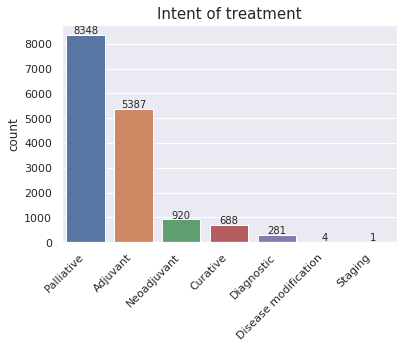

In [50]:
ax = sns.countplot(data=df, x='INTENT_OF_TREATMENT', order=['Palliative', 'Adjuvant','Neoadjuvant','Curative','Diagnostic',
                                                               'Disease modification','Staging'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
ax.set_title('Intent of treatment', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 50, height, ha='center')

Similarly to the previous notebooks, I am going to convert this variable so that I have all the data of each patient in a single row.

In [51]:
df['INTENT_OF_TREATMENT'] = df['INTENT_OF_TREATMENT'].astype(str)
df['NEOADJUVANT'] = df.groupby('PATIENTID')['INTENT_OF_TREATMENT'].transform(lambda patient: 1 if any('Neoadjuvant' in tumour for tumour in patient) else 0)
df['DIAGNOSTIC'] = df.groupby('PATIENTID')['INTENT_OF_TREATMENT'].transform(lambda patient: 1 if any('Diagnostic' in tumour for tumour in patient) else 0)
df['PALLIATIVE'] = df.groupby('PATIENTID')['INTENT_OF_TREATMENT'].transform(lambda patient: 1 if any('Palliative' in tumour for tumour in patient) else 0)
df['CURATIVE'] = df.groupby('PATIENTID')['INTENT_OF_TREATMENT'].transform(lambda patient: 1 if any('Curative' in tumour for tumour in patient) else 0)
df['ADJUVANT'] = df.groupby('PATIENTID')['INTENT_OF_TREATMENT'].transform(lambda patient: 1 if any('Adjuvant' in tumour for tumour in patient) else 0)
df['DISEASE_MOD'] = df.groupby('PATIENTID')['INTENT_OF_TREATMENT'].transform(lambda patient: 1 if any('Disease modification' in tumour for tumour in patient) else 0)
df['STAGING'] = df.groupby('PATIENTID')['INTENT_OF_TREATMENT'].transform(lambda patient: 1 if any('Staging' in tumour for tumour in patient) else 0)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,T,N,M,STAGE,GRADE_2,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG,DEPR,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAGNOSISDATEBEST,MERGED_PATIENT_ID_x,LINK_NUMBER,MERGED_TUMOUR_ID,MERGED_REGIMEN_ID,INTENT_OF_TREATMENT,START_DATE_OF_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,MERGED_PATIENT_ID_y,BENCHMARK_GROUP,HEIGHT,WEIGHT,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING
0,10001000,F,810001000,White British,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,0.0,0.0,3.0,2.0,79.0,0,1,0,0,0,0,0,0,0,0,0,2.0,4.0,3.857711,120.0,2013-03-07,10001000.0,810001000.0,10002223.0,10003950.0,nan,2013-03-19,N,NaN,10001000.0,TRIAL,1.80,67.75,20.910494,0,0,0,0,0,0,0
1,10001000,F,810001000,White British,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,0.0,0.0,3.0,2.0,79.0,0,1,0,0,0,0,0,0,0,0,0,2.0,4.0,3.857711,120.0,2013-03-07,10001000.0,810001000.0,10005351.0,10009879.0,nan,2015-09-26,02,N,10001000.0,NOT CHEMO,1.80,67.75,20.910494,0,0,0,0,0,0,0
2,10001128,F,810001128,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,0.0,0.0,3.0,2.0,86.0,0,0,1,0,0,0,0,0,0,0,0,0.0,1.0,2.234132,0.0,2014-10-23,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,1.68,74.00,26.218821,0,0,0,0,0,0,0
3,10001482,F,810001482,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.0,0.0,0.0,3.0,2.0,77.0,1,0,0,0,0,0,0,0,0,1,0,0.0,3.0,3.022649,0.0,2014-01-08,10001482.0,810001482.0,10005354.0,10011398.0,Palliative,2015-11-23,02,NaN,10001482.0,BORTEZOMIB,1.63,90.15,33.930521,0,0,1,0,0,0,0
4,10001482,F,810001482,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.0,0.0,0.0,3.0,2.0,77.0,1,0,0,0,0,0,0,0,0,1,0,0.0,3.0,3.022649,0.0,2014-01-08,10001482.0,810001482.0,10010150.0,10007977.0,nan,2014-07-18,N,NaN,10001482.0,DOCETAXEL,1.63,90.15,33.930521,0,0,1,0,0,0,0


In [52]:
df = df.drop(['INTENT_OF_TREATMENT'], axis=1)

In [53]:
df['START_DATE_OF_REGIMEN'].sort_values().dropna().head(10)

44355    1860-03-02
44356    1860-07-30
44357    1860-08-20
27997    1860-11-05
9875     1975-06-18
9872     1975-07-02
9880     1975-12-23
9879     1975-12-31
19875    2006-03-19
19876    2006-03-19
Name: START_DATE_OF_REGIMEN, dtype: object

In [54]:
df['START_DATE_OF_REGIMEN'].sort_values(ascending=False).dropna().head(10)

25949    2018-07-23
25950    2018-07-23
26192    2018-04-03
5464     2018-03-31
524      2018-03-29
523      2018-03-27
25948    2018-03-19
27519    2018-02-08
26060    2018-02-07
34967    2018-02-01
Name: START_DATE_OF_REGIMEN, dtype: object

Now I am going to create a variable that will indicate the time elapsed between the date of diagnosis and the start date of treatment.

In [55]:
df['START_DATE_OF_REGIMEN'] = pd.to_datetime(df['START_DATE_OF_REGIMEN'])
df['DIAGNOSISDATEBEST'] = pd.to_datetime(df['DIAGNOSISDATEBEST'])
df['DIAG_TO_TREAT'] = df['START_DATE_OF_REGIMEN'] - df['DIAGNOSISDATEBEST']
df['DIAG_TO_TREAT_DAYS'] = df['DIAG_TO_TREAT'] / np.timedelta64(1, 'D')
df[['START_DATE_OF_REGIMEN', 'DIAGNOSISDATEBEST', 'DIAG_TO_TREAT', 'DIAG_TO_TREAT_DAYS']].dropna().head()

,START_DATE_OF_REGIMEN,DIAGNOSISDATEBEST,DIAG_TO_TREAT,DIAG_TO_TREAT_DAYS
0,2013-03-19,2013-03-07,12 days,12.0
1,2015-09-26,2013-03-07,933 days,933.0
3,2015-11-23,2014-01-08,684 days,684.0
4,2014-07-18,2014-01-08,191 days,191.0
5,2015-08-03,2014-01-08,572 days,572.0


In [56]:
df['DIAG_TO_TREAT_DAYS'].sort_values().head(20)

44355   -56854.0
44356   -56704.0
44357   -56683.0
27997   -55655.0
9875    -14763.0
9880    -14562.0
9879    -14554.0
9872    -14397.0
19876    -2538.0
19875    -2538.0
19878    -2510.0
9112     -2391.0
18461    -2162.0
18468    -2162.0
1415     -2104.0
392      -2088.0
391      -2088.0
31390    -2003.0
31391    -1925.0
31392    -1925.0
Name: DIAG_TO_TREAT_DAYS, dtype: float64

In [57]:
df['DIAG_TO_TREAT_DAYS'].sort_values(ascending=False).head(20)

25437    1551.0
25950    1491.0
25949    1491.0
26669    1478.0
29877    1476.0
33357    1452.0
42921    1451.0
25345    1450.0
43277    1430.0
19880    1412.0
32772    1408.0
19879    1405.0
29645    1403.0
30132    1401.0
9706     1386.0
13137    1386.0
19877    1384.0
25432    1383.0
29644    1382.0
13136    1379.0
Name: DIAG_TO_TREAT_DAYS, dtype: float64

In [58]:
df['DIAG_TO_TREAT_DAYS'].describe()

count    19074.000000
mean       158.155237
std        917.532999
min     -56854.000000
25%         46.000000
50%        104.000000
75%        337.000000
max       1551.000000
Name: DIAG_TO_TREAT_DAYS, dtype: float64

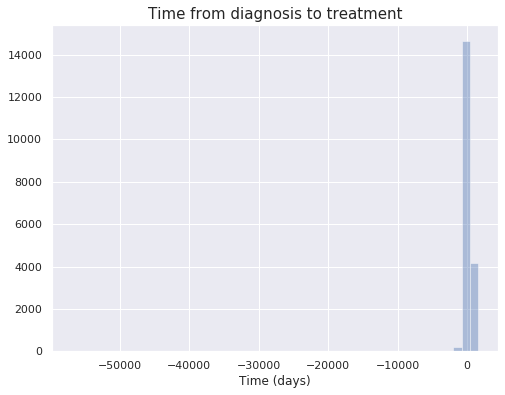

In [59]:
ax = sns.distplot(df['DIAG_TO_TREAT_DAYS'], hist=True, kde=False, bins=50)
plt.gcf().set_size_inches(8,6)
ax.set_title('Time from diagnosis to treatment', fontsize=15)
ax.set_xlabel('Time (days)', fontsize=12);

Negative values will be removed.

In [60]:
def diag_to_treat(value):
    if value < 0:
        return np.nan
    else:
        return value
    
df['DIAG_TO_TREAT_DAYS'] = df['DIAG_TO_TREAT_DAYS'].apply(diag_to_treat)
df['DIAG_TO_TREAT_DAYS'].describe()

count    16282.000000
mean       264.258261
std        268.579412
min          0.000000
25%         70.000000
50%        142.000000
75%        392.000000
max       1551.000000
Name: DIAG_TO_TREAT_DAYS, dtype: float64

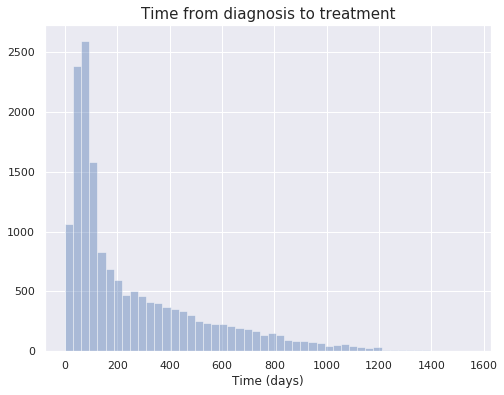

In [61]:
ax = sns.distplot(df['DIAG_TO_TREAT_DAYS'], hist=True, kde=False, bins=50)
plt.gcf().set_size_inches(8,6)
ax.set_title('Time from diagnosis to treatment', fontsize=15)
ax.set_xlabel('Time (days)', fontsize=12);

Since the time elapsed between the date of diagnosis and the start date of regimen might be different for each regimen the patient receives, I am going to create a variable with the median time elapsed for each patient.

In [62]:
df['DIAG_TO_TREAT_DAYS_MEDIAN'] = df.groupby('PATIENTID')['DIAG_TO_TREAT_DAYS'].transform(np.median)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,T,N,M,STAGE,GRADE_2,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG,DEPR,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAGNOSISDATEBEST,MERGED_PATIENT_ID_x,LINK_NUMBER,MERGED_TUMOUR_ID,MERGED_REGIMEN_ID,START_DATE_OF_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,MERGED_PATIENT_ID_y,BENCHMARK_GROUP,HEIGHT,WEIGHT,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,DIAG_TO_TREAT,DIAG_TO_TREAT_DAYS,DIAG_TO_TREAT_DAYS_MEDIAN
0,10001000,F,810001000,White British,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,0.0,0.0,3.0,2.0,79.0,0,1,0,0,0,0,0,0,0,0,0,2.0,4.0,3.857711,120.0,2013-03-07,10001000.0,810001000.0,10002223.0,10003950.0,2013-03-19,N,NaN,10001000.0,TRIAL,1.80,67.75,20.910494,0,0,0,0,0,0,0,12 days,12.0,472.5
1,10001000,F,810001000,White British,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,0.0,0.0,3.0,2.0,79.0,0,1,0,0,0,0,0,0,0,0,0,2.0,4.0,3.857711,120.0,2013-03-07,10001000.0,810001000.0,10005351.0,10009879.0,2015-09-26,02,N,10001000.0,NOT CHEMO,1.80,67.75,20.910494,0,0,0,0,0,0,0,933 days,933.0,472.5
2,10001128,F,810001128,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,0.0,0.0,3.0,2.0,86.0,0,0,1,0,0,0,0,0,0,0,0,0.0,1.0,2.234132,0.0,2014-10-23,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,1.68,74.00,26.218821,0,0,0,0,0,0,0,NaT,NaN,NaN
3,10001482,F,810001482,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.0,0.0,0.0,3.0,2.0,77.0,1,0,0,0,0,0,0,0,0,1,0,0.0,3.0,3.022649,0.0,2014-01-08,10001482.0,810001482.0,10005354.0,10011398.0,2015-11-23,02,NaN,10001482.0,BORTEZOMIB,1.63,90.15,33.930521,0,0,1,0,0,0,0,684 days,684.0,596.5
4,10001482,F,810001482,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.0,0.0,0.0,3.0,2.0,77.0,1,0,0,0,0,0,0,0,0,1,0,0.0,3.0,3.022649,0.0,2014-01-08,10001482.0,810001482.0,10010150.0,10007977.0,2014-07-18,N,NaN,10001482.0,DOCETAXEL,1.63,90.15,33.930521,0,0,1,0,0,0,0,191 days,191.0,596.5


Missing values will be filled with the median time elapsed.

In [63]:
df['DIAG_TO_TREAT_DAYS_MEDIAN'] = df['DIAG_TO_TREAT_DAYS_MEDIAN'].fillna(df['DIAG_TO_TREAT_DAYS_MEDIAN'].median())
df['DIAG_TO_TREAT_DAYS_MEDIAN'].describe()

count    45415.000000
mean       204.566817
std        143.075434
min          0.000000
25%        175.000000
50%        175.000000
75%        175.000000
max       1405.000000
Name: DIAG_TO_TREAT_DAYS_MEDIAN, dtype: float64

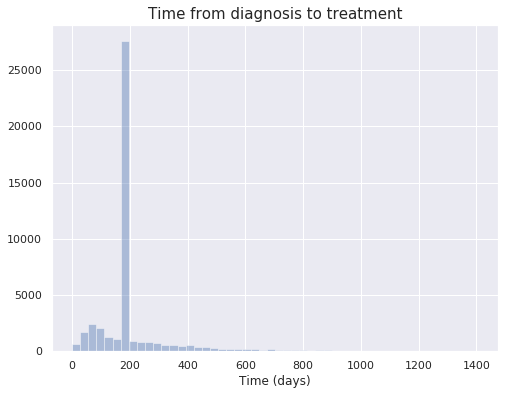

In [64]:
ax = sns.distplot(df['DIAG_TO_TREAT_DAYS_MEDIAN'], hist=True, kde=False, bins=50)
plt.gcf().set_size_inches(8,6)
ax.set_title('Time from diagnosis to treatment', fontsize=15)
ax.set_xlabel('Time (days)', fontsize=12);

In [65]:
df['CLINICAL_TRIAL'].value_counts()

N     10236
02     4241
2      1786
Y       372
01      152
99      100
1        67
3         6
EE        1
Name: CLINICAL_TRIAL, dtype: int64

In [66]:
df['CLINICAL_TRIAL'] = df['CLINICAL_TRIAL'].astype(str)
def clinical_trial(value):
    if value == '1' or value == '01' or value == 'Y':
        return 'Y'
    elif value == '2' or value == '02' or value == 'N' or value == 'NO':
        return 'N'
    elif value == '99' or value == '3' or value == '0' or value == 'n' or value == 'EE' or value == 'nan':
        return np.nan
    else:
        return value
df['CLINICAL_TRIAL'] = df['CLINICAL_TRIAL'].apply(clinical_trial)    
df['CLINICAL_TRIAL'].value_counts()

N    16263
Y      591
Name: CLINICAL_TRIAL, dtype: int64

Note: further details about the classification of this variable can be found here: https://www.datadictionary.nhs.uk/data_dictionary/attributes/c/cla/clinical_trial_indicator_de.asp?shownav=1. 9, 3, 0, n and EE were removed since they are not present in the official classification.

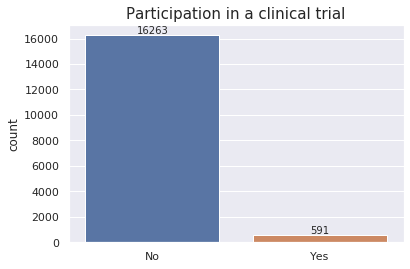

In [67]:
ax = sns.countplot(data=df, x='CLINICAL_TRIAL')
ax.set_title('Participation in a clinical trial', fontsize=15)
ax.set_xlabel('')
ax.set_xticklabels(['No', 'Yes'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 100, height, ha='center')

In [68]:
df['CLINICAL_TRIAL'] = df['CLINICAL_TRIAL'].astype(str)
df['CT_YES'] = df.groupby('PATIENTID')['CLINICAL_TRIAL'].transform(lambda patient: 1 if any('Y' in tumour for tumour in patient) else 0)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,T,N,M,STAGE,GRADE_2,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG,DEPR,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAGNOSISDATEBEST,MERGED_PATIENT_ID_x,LINK_NUMBER,MERGED_TUMOUR_ID,MERGED_REGIMEN_ID,START_DATE_OF_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,MERGED_PATIENT_ID_y,BENCHMARK_GROUP,HEIGHT,WEIGHT,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,DIAG_TO_TREAT,DIAG_TO_TREAT_DAYS,DIAG_TO_TREAT_DAYS_MEDIAN,CT_YES
0,10001000,F,810001000,White British,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,0.0,0.0,3.0,2.0,79.0,0,1,0,0,0,0,0,0,0,0,0,2.0,4.0,3.857711,120.0,2013-03-07,10001000.0,810001000.0,10002223.0,10003950.0,2013-03-19,N,NaN,10001000.0,TRIAL,1.80,67.75,20.910494,0,0,0,0,0,0,0,12 days,12.0,472.5,0
1,10001000,F,810001000,White British,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,0.0,0.0,3.0,2.0,79.0,0,1,0,0,0,0,0,0,0,0,0,2.0,4.0,3.857711,120.0,2013-03-07,10001000.0,810001000.0,10005351.0,10009879.0,2015-09-26,N,N,10001000.0,NOT CHEMO,1.80,67.75,20.910494,0,0,0,0,0,0,0,933 days,933.0,472.5,0
2,10001128,F,810001128,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,0.0,0.0,3.0,2.0,86.0,0,0,1,0,0,0,0,0,0,0,0,0.0,1.0,2.234132,0.0,2014-10-23,NaN,NaN,NaN,NaN,NaT,nan,NaN,NaN,NaN,1.68,74.00,26.218821,0,0,0,0,0,0,0,NaT,NaN,175.0,0
3,10001482,F,810001482,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.0,0.0,0.0,3.0,2.0,77.0,1,0,0,0,0,0,0,0,0,1,0,0.0,3.0,3.022649,0.0,2014-01-08,10001482.0,810001482.0,10005354.0,10011398.0,2015-11-23,N,NaN,10001482.0,BORTEZOMIB,1.63,90.15,33.930521,0,0,1,0,0,0,0,684 days,684.0,596.5,0
4,10001482,F,810001482,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.0,0.0,0.0,3.0,2.0,77.0,1,0,0,0,0,0,0,0,0,1,0,0.0,3.0,3.022649,0.0,2014-01-08,10001482.0,810001482.0,10010150.0,10007977.0,2014-07-18,N,NaN,10001482.0,DOCETAXEL,1.63,90.15,33.930521,0,0,1,0,0,0,0,191 days,191.0,596.5,0


In [69]:
df = df.drop(['CLINICAL_TRIAL'], axis=1)

In [70]:
df['CHEMO_RADIATION'].value_counts()

N    14668
Y      230
2       66
n       12
X        6
Name: CHEMO_RADIATION, dtype: int64

In [71]:
df['CHEMO_RADIATION'] = df['CHEMO_RADIATION'].astype(str)
def chemo(value):
    if value == 'Y' or value == 'y':
        return 'Y'
    elif value == 'N' or value == 'n':
        return 'N'
    elif value == '2' or value == 'X' or value == 'nan':
        return np.nan
    else:
        return value
df['CHEMO_RADIATION'] = df['CHEMO_RADIATION'].apply(chemo)    
df['CHEMO_RADIATION'].value_counts()

N    14680
Y      230
Name: CHEMO_RADIATION, dtype: int64

Note: further details about the classification of this variable can be found in the file "NHS codes". 1 and X were removed since they are not present in the official classification.

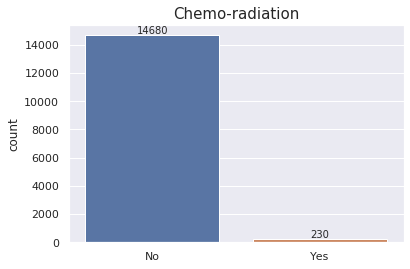

In [72]:
ax = sns.countplot(data=df, x='CHEMO_RADIATION')
ax.set_title('Chemo-radiation', fontsize=15)
ax.set_xlabel('')
ax.set_xticklabels(['No', 'Yes'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 100, height, ha='center')

In [73]:
df['CHEMO_RADIATION'] = df['CHEMO_RADIATION'].astype(str)
df['CHEM_RAD_YES'] = df.groupby('PATIENTID')['CHEMO_RADIATION'].transform(lambda patient: 1 if any('Y' in tumour for tumour in patient) else 0)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,T,N,M,STAGE,GRADE_2,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG,DEPR,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAGNOSISDATEBEST,MERGED_PATIENT_ID_x,LINK_NUMBER,MERGED_TUMOUR_ID,MERGED_REGIMEN_ID,START_DATE_OF_REGIMEN,CHEMO_RADIATION,MERGED_PATIENT_ID_y,BENCHMARK_GROUP,HEIGHT,WEIGHT,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,DIAG_TO_TREAT,DIAG_TO_TREAT_DAYS,DIAG_TO_TREAT_DAYS_MEDIAN,CT_YES,CHEM_RAD_YES
0,10001000,F,810001000,White British,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,0.0,0.0,3.0,2.0,79.0,0,1,0,0,0,0,0,0,0,0,0,2.0,4.0,3.857711,120.0,2013-03-07,10001000.0,810001000.0,10002223.0,10003950.0,2013-03-19,nan,10001000.0,TRIAL,1.80,67.75,20.910494,0,0,0,0,0,0,0,12 days,12.0,472.5,0,0
1,10001000,F,810001000,White British,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,0.0,0.0,3.0,2.0,79.0,0,1,0,0,0,0,0,0,0,0,0,2.0,4.0,3.857711,120.0,2013-03-07,10001000.0,810001000.0,10005351.0,10009879.0,2015-09-26,N,10001000.0,NOT CHEMO,1.80,67.75,20.910494,0,0,0,0,0,0,0,933 days,933.0,472.5,0,0
2,10001128,F,810001128,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,0.0,0.0,3.0,2.0,86.0,0,0,1,0,0,0,0,0,0,0,0,0.0,1.0,2.234132,0.0,2014-10-23,NaN,NaN,NaN,NaN,NaT,nan,NaN,NaN,1.68,74.00,26.218821,0,0,0,0,0,0,0,NaT,NaN,175.0,0,0
3,10001482,F,810001482,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.0,0.0,0.0,3.0,2.0,77.0,1,0,0,0,0,0,0,0,0,1,0,0.0,3.0,3.022649,0.0,2014-01-08,10001482.0,810001482.0,10005354.0,10011398.0,2015-11-23,nan,10001482.0,BORTEZOMIB,1.63,90.15,33.930521,0,0,1,0,0,0,0,684 days,684.0,596.5,0,0
4,10001482,F,810001482,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.0,0.0,0.0,3.0,2.0,77.0,1,0,0,0,0,0,0,0,0,1,0,0.0,3.0,3.022649,0.0,2014-01-08,10001482.0,810001482.0,10010150.0,10007977.0,2014-07-18,nan,10001482.0,DOCETAXEL,1.63,90.15,33.930521,0,0,1,0,0,0,0,191 days,191.0,596.5,0,0


In [74]:
df = df.drop(['CHEMO_RADIATION'], axis=1)

In [75]:
df['BENCHMARK_GROUP'].value_counts()

CAPECITABINE + OXALIPLATIN                      3515
OXALIPLATIN + MDG                               3072
CAPECITABINE                                    2658
IRINOTECAN + MDG                                1603
FLUOROURACIL                                    1023
NOT CHEMO                                        538
BEVACIZUMAB                                      522
CETUXIMAB + IRINOTECAN + MDG                     518
BEVACIZUMAB + CAPE + OXALIPLATIN                 381
CETUXIMAB                                        375
CAPECITABINE + IRINOTECAN                        271
BEVACIZUMAB + OXALIPLATIN + MdG                  224
AFLIBERCEPT + FU + IRINOTECAN                    187
IRINOTECAN                                       166
OXALIPLATIN + RALTITREXED                        143
TRIAL                                            135
BEVACIZUMAB + CAPECITABINE                       127
CAPECITABINE + RT                                122
BEVACIZUMAB + IRINOTECAN + MdG                

In order to simplify the analysis, instead of creating new variables for each of the individual treatments, I am going to create new variables that will represent treatment groups. Therefore, I am going to classify all the treatments under each of the treatment groups.

The treatment groups that I am going to create are "chemotherapy", "targeted therapy", "chemotherapy + targeted therapy", "chemotherapy + radiotherapy", "targeted therapy + radiotherapy", "hormone therapy" and "other therapy".

In [76]:
def chemo(value):
    if value in ['CAPECITABINE + OXALIPLATIN','OXALIPLATIN + MDG','CAPECITABINE','IRINOTECAN + MDG','FLUOROURACIL','FEC','CVD',
                'CAPECITABINE + IRINOTECAN','AFLIBERCEPT + FU + IRINOTECAN','IRINOTECAN','OXALIPLATIN + RALTITREXED','EC','EP',
                'FOXTROT TRIAL','CARBOPLATIN + ETOPOSIDE','FLUOROURACIL + IRINOTECAN + OXALIPLATIN','RALTITREXED','EOX','ABVD',
                'CARBOPLATIN + PACLITAXEL','OXALIPLATIN','SCOT TRIAL','MITOMYCIN INTRAVESICULAR','CARBOPLATIN','DOCETAXEL','ACE',
                'CISPLATIN','CAPECITABINE + MITOMYCIN','CISPLATIN + ETOPOSIDE','GEMCARBO','CYCLOPHOSPHAMIDE + DOCETAXEL','ECX',
                'CISPLATIN + GEMCITABINE','GEMCITABINE','FEC + DOCETAXEL','AFLIBERCEPT','CISPLATIN + PEMETREXED','AML17','BEP',
                'HYDROXYCARBAMIDE','PACLITAXEL','CISPLATIN + VINORELBINE','CISPLATIN + FLUOROURACIL','CUFOX TRIAL','CHOP','CTD',
                'CARBOPLATIN + VINORELBINE','CAPECITABINE + CISPLATIN','BENDAMUSTINE','MITOMYCIN','CARBOPLATIN + PEMETREXED','AC',
                'CARBO + FLUOROURACIL','DOXORUBICIN','CHLORAMBUCIL','AZACITIDINE','EPIRUBICIN','IRINOTECAN + RALTITREXED','CMF',
                'FLUOROURACIL + MITOMYCIN','VINORELBINE','PEMETREXED','CYCLOPHOSPHAMIDE + DOCETAXEL + EPIRUBICIN','MELPHALAN',
                'CVP','DACARBAZINE','CAP','METHOTREXATE HIGH DOSE','CAPECITABINE + GEMCITABINE','CYCLOPHOSPHAMIDE HIGH DOSE','CMV',
                'CYCLOPHOSPHAMIDE','CYTARABINE HD + METHOTREXATE HD','CAPECITABINE + CARBOPLATIN','DOXORUBICIN EMBOLISATION','IVA',
                'CABAZITAXEL','TAC','AFLIBERCEPT + IRINOTECAN + OXALIPLATIN + MDG','EOF','TEMOZOLOMIDE','FOCUS4 TRIAL','DA','CAV',
                'CAPECITABINE + STREPTOZOCIN','CAPECITABINE + EPIRUBICIN + OXALIPLATIN','CLADRIBINE','ETOPOSIDE','METHOTREXATE',
                'GEMCITABINE + PACLITAXEL','NAB-PACLITAXEL','PANTHER TRIAL','CARBOPLATIN + OXALIPLATIN','CARBOPLATIN + TOPOTECAN',
                'AFLIBERCEPT + IRINOTECAN + MDG','CISPLATIN + DOXORUBICIN','METHOTREXATE INTRATHECAL','FLUDARABINE','AML16','TCF',
                'CAPECITABINE + CARBOPLATIN + EPIRUBICIN','UKALL2011','CAPECITABINE + OXALIPLATIN + MDG','TRAPEZE TRIAL','VEDEX',
                'CAPECITABINE + VINORELBINE','CISPLATIN + DOCETAXEL + FLUOROURACIL','CODOX M','FLAG + IDARUBICIN','PCV','LEAM',
                'AFLIBERCEPT + FLUOROURACIL','CYTARABINE HIGH DOSE','EC + PACLITAXEL','VINBLASTINE','CHLVPP','OEPA','IPM','FCIST',
                'CAPECITABINE + CISPLATIN + EPIRUBICIN','CARBOPLATIN + LIPOSOMAL DOX','FLUOROURACIL + STREPTOZOCIN','IVE','MIC',
                'CISPLATIN + TOPOTECAN','CARBOPLATIN + EPIRUBICIN','CAPECITABINE + IRINOTECAN + MDG','ICON TRIAL','VEPEMB','ECF',
                'CISPLATIN + DOCETAXEL','CARBOPLATIN + VINCRISTINE','GEMCITABINE + VINORELBINE','RAVVA TRIAL','ACE (GERM CELL)',
                'ATG + BUSULFAN + FLUDARABINE','TOPOTECAN','CISPLATIN + MITOMYCIN','LIPOSOMAL DOXORUBICIN','DHAP','CYTARABINE',
                'CYCLOPHOSPHAMIDE + VINCRISTINE','MITOTANE','URACIL','LOPP','TRIPLE INTRATHECAL','FAB LMB','MVP','EEX','BEAM',
                'CARBOPLATIN + METHOTREXATE + VINBLASTINE','CAPECITABINE + TEMOZOLOMIDE','CARBOPLATIN + DOXORUBICIN','SPIRIT TRIAL',
                'DOXORUBICIN + IFOSFAMIDE','MITOMYCIN + RALTITREXED','CISPLATIN + IRINOTECAN','CISPLATIN + PACLITAXEL','MVAC',
                'GEMCITABINE + NAB-PACLITAXEL','ETOPOSIDE + IFOSFAMIDE','NEOSCOPE TRIAL','CARBOPLATIN + IRINOTECAN','COUGAR TRIAL',
                'CHLORAMBUCIL + ETOPOSIDE + LOMUSTINE','IFOSFAMIDE','CYTARABINE + IDARUBICIN','CARMUSTINE + THIOTEPA']:
        return 'Chemotherapy'
    else:
        return value

df['CHEMOTHERAPY'] = df['BENCHMARK_GROUP'].apply(chemo)  
df['CHEMOTHERAPY'].value_counts()

Chemotherapy                                  14492
NOT CHEMO                                       538
BEVACIZUMAB                                     522
CETUXIMAB + IRINOTECAN + MDG                    518
BEVACIZUMAB + CAPE + OXALIPLATIN                381
CETUXIMAB                                       375
BEVACIZUMAB + OXALIPLATIN + MdG                 224
TRIAL                                           135
BEVACIZUMAB + CAPECITABINE                      127
CAPECITABINE + RT                               122
BEVACIZUMAB + IRINOTECAN + MdG                  120
HORMONES                                        117
CETUXIMAB + OXALIPLATIN + MDG                   102
CHOP R                                          100
RITUXIMAB                                        66
PANITUMUMAB                                      61
NOT MATCHED                                      60
CETUXIMAB + IRINOTECAN                           55
TRASTUZUMAB                                      52
ZOLEDRONIC A

In [77]:
def targeted(value):
    if value in ['BEVACIZUMAB','CETUXIMAB','RITUXIMAB','PANITUMUMAB','TRASTUZUMAB','DENOSUMAB','BORTEZOMIB','LENALIDOMIDE',
                'IPILIMUMAB','IBRUTINIB','PAZOPANIB','EVEROLIMUS','SORAFENIB','VEMURAFENIB','MYELOMA XI TRIAL','IMATINIB',
                'PEMBROLIZUMAB','NILOTINIB','GEFITINIB','SUNITINIB','DABRAFENIB','ALEMTUZUMAB','ERLOTINIB','LAPATINIB',
                'RUXOLITINIB','VISMODEGIB','IDELALISIB + RITUXIMAB','OFATUMUMAB','CRIZOTINIB','EPHOS-B TRIAL','AFATINIB',
                'PERTUZUMAB + TRASTUZUMAB','VANDETANIB','KAITLIN TRIAL','BORTEZOMIB + THALIDOMIDE','TRASTUZUMAB EMTANSINE',
                'BRENTUXIMAB','THALIDOMIDE','STAKT TRIAL']:
        return 'Targeted'
    else:
        return value

df['TARGETED'] = df['BENCHMARK_GROUP'].apply(targeted)
df['TARGETED'].value_counts()

CAPECITABINE + OXALIPLATIN                      3515
OXALIPLATIN + MDG                               3072
CAPECITABINE                                    2658
IRINOTECAN + MDG                                1603
Targeted                                        1271
FLUOROURACIL                                    1023
NOT CHEMO                                        538
CETUXIMAB + IRINOTECAN + MDG                     518
BEVACIZUMAB + CAPE + OXALIPLATIN                 381
CAPECITABINE + IRINOTECAN                        271
BEVACIZUMAB + OXALIPLATIN + MdG                  224
AFLIBERCEPT + FU + IRINOTECAN                    187
IRINOTECAN                                       166
OXALIPLATIN + RALTITREXED                        143
TRIAL                                            135
BEVACIZUMAB + CAPECITABINE                       127
CAPECITABINE + RT                                122
BEVACIZUMAB + IRINOTECAN + MdG                   120
HORMONES                                      

In [78]:
def chem_targ(value):
    if value in ['CETUXIMAB + IRINOTECAN + MDG','BEVACIZUMAB + CAPE + OXALIPLATIN','BEVACIZUMAB + OXALIPLATIN + MdG','HCX',
                'BEVACIZUMAB + CAPECITABINE','BEVACIZUMAB + IRINOTECAN + MdG','CETUXIMAB + OXALIPLATIN + MDG','CHOP R',
                'CETUXIMAB + IRINOTECAN','BEVACIZUMAB + CAPE + IRINOTECAN','BENDAMUSTINE + RITUXIMAB','CVP R','TCH','DHAP - R',
                'CAPECITABINE + CETUXIMAB + IRINOTECAN','BEVACIZUMAB + IRINOTECAN + MDG','BEVACIZUMAB + FLUOROURACIL','RCEOP',
                'FEC + DOCETAXEL + TRASTUZUMAB','CETUXIMAB + MDG','OXALIPLATIN + MDG + PANITUMUMAB','CHLORAMBUCIL + RITUXIMAB',
                'PACLITAXEL + TRASTUZUMAB','BEVACIZUMAB + CARBOPLATIN + PACLITAXEL','FCR','CYCLO + DOCETAXEL + TRASTUZUMAB',
                'BEVACIZUMAB + CARBO + PACLITAXEL','DOCETAXEL + TRASTUZUMAB','CYCLOPHOSPHAMIDE + LENALIDOMIDE','REMODL TRIAL',
                'CAPECITABINE + CETUXIMAB + OXALIPATIN','BEVACIZUMAB + OXALIPLATIN + MDG','BEVACIZUMAB + MDG','PAD','R CODOX M',
                'CHLORAMBUCIL + OFATUMUMAB','RIALTO TRIAL','CETUXIMAB + OXALIPLATIN','MPV','R-EPOCH','BEVACIZUMAB + OXALIPLATIN',
                'PACLITAXEL + PERTUZUMAB + TRASTUZUMAB','CAPECITABINE + CETUXIMAB + OXALIPLATIN','FEC + TRASTUZUMAB','UKALL 2011',
                'CYCLOPHOSPHAMIDE + RITUXIMAB','BEVACIZUMAB + OXALIPLATIN + RALTITREXED','R CODOX-M/ R IVAC','METROBIBF TRIAL',
                'CAPECITABINE + CETUXIMAB','CYCLOPHOSPHAMIDE + RITUXIMAB + VINCRISTINE','DOCETAXEL + PERTUZUMAB + TRASTUZUMAB',
                'CYCLOPHOSPHAMIDE + DOCETAXEL + TRASTUZUMAB','ICE-R','CARBOPLATIN + CETUXIMAB + FU','BENDAMUSTINE + THALIDOMIDE',
                'BEVACIZUMAB + CISPLATIN + PACLITAXEL','IRINOTECAN + MDG + PANITUMUMAB','CAPE + CARBOPLATIN + CETUXIMAB',
                'CETUXIMAB + IRINOTECAN + RALTITREXED','CYCLO + RITUXIMAB + VINCRISTINE','TAC + TRASTUZUMAB','IVE-R','DTPACE',
                'CYTARABINE + RITUXIMAB','CHLORAMBUCIL + OBINUTUZUMAB','CARBO + DOCETAXEL + TRASTUZUMAB','TACE-2 TRIAL',
                'CVP R + GEMCITABINE','BEVACIZUMAB + IRINOTECAN','CAPE + CETUXIMAB + OXALIPLATIN','FLAIR TRIAL','FOCUS3 TRIAL',
                'BEVACIZUMAB + PACLITAXEL','CARBOPLATIN + CETUXIMAB + FLUOROURACIL','CAPECITABINE + LAPATINIB','ABVD R',
                'ALEMTUZUMAB + FLUDARABINE + MELPHALAN','NEPTUNE TRIAL']:
        return 'Chem_Targ'
    else:
        return value

df['CHEM_TARG'] = df['BENCHMARK_GROUP'].apply(chem_targ) 
df['CHEM_TARG'].value_counts()

CAPECITABINE + OXALIPLATIN                      3515
OXALIPLATIN + MDG                               3072
CAPECITABINE                                    2658
Chem_Targ                                       2063
IRINOTECAN + MDG                                1603
FLUOROURACIL                                    1023
NOT CHEMO                                        538
BEVACIZUMAB                                      522
CETUXIMAB                                        375
CAPECITABINE + IRINOTECAN                        271
AFLIBERCEPT + FU + IRINOTECAN                    187
IRINOTECAN                                       166
OXALIPLATIN + RALTITREXED                        143
TRIAL                                            135
CAPECITABINE + RT                                122
HORMONES                                         117
FOXTROT TRIAL                                     89
CARBOPLATIN + ETOPOSIDE                           87
FLUOROURACIL + IRINOTECAN + OXALIPLATIN       

In [79]:
def chem_radio(value):
    if value in ['CAPECITABINE + RT','CISPLATIN + RT','FOXFIRE TRIAL','FLUOROURACIL + MITOMYCIN + RT','FLUOROURACIL + RT',
                'CAP + RT','CISPLATIN + ETOPOSIDE + RT','TEMOZOLOMIDE + RT','CISPLATIN + FLUOROURACIL + RT','STAMPEDE TRIAL',
                'ARISTOTLE TRIAL','CARBOPLATIN + RT','INTERLACE TRIAL','CAPECITABINE + OXALIPLATIN + RT','COPERNICUS TRIAL',
                'CEDAR TRIAL','CAPECITABINE + MITOMYCIN + RT','CAPECITABINE + CISPLATIN + RT','BR14 TRIAL','GEMCITABINE + RT',
                'CISPLATIN + VINORELBINE + RT','CISPLATIN + VINORELBINE + RT','CAPECITABINE + CARBOPLATIN + RT']:
        return 'Chem_Radio'
    else:
        return value

df['CHEM_RADIO'] = df['BENCHMARK_GROUP'].apply(chem_radio) 
df['CHEM_RADIO'].value_counts()

CAPECITABINE + OXALIPLATIN                      3515
OXALIPLATIN + MDG                               3072
CAPECITABINE                                    2658
IRINOTECAN + MDG                                1603
FLUOROURACIL                                    1023
NOT CHEMO                                        538
BEVACIZUMAB                                      522
CETUXIMAB + IRINOTECAN + MDG                     518
BEVACIZUMAB + CAPE + OXALIPLATIN                 381
CETUXIMAB                                        375
CAPECITABINE + IRINOTECAN                        271
Chem_Radio                                       254
BEVACIZUMAB + OXALIPLATIN + MdG                  224
AFLIBERCEPT + FU + IRINOTECAN                    187
IRINOTECAN                                       166
OXALIPLATIN + RALTITREXED                        143
TRIAL                                            135
BEVACIZUMAB + CAPECITABINE                       127
BEVACIZUMAB + IRINOTECAN + MdG                

In [80]:
def targ_radio(value):
    if value in ['CETUXIMAB + RT']:
        return 'Targ_Radio'
    else:
        return value

df['TARG_RADIO'] = df['BENCHMARK_GROUP'].apply(targ_radio) 
df['TARG_RADIO'].value_counts()

CAPECITABINE + OXALIPLATIN                      3515
OXALIPLATIN + MDG                               3072
CAPECITABINE                                    2658
IRINOTECAN + MDG                                1603
FLUOROURACIL                                    1023
NOT CHEMO                                        538
BEVACIZUMAB                                      522
CETUXIMAB + IRINOTECAN + MDG                     518
BEVACIZUMAB + CAPE + OXALIPLATIN                 381
CETUXIMAB                                        375
CAPECITABINE + IRINOTECAN                        271
BEVACIZUMAB + OXALIPLATIN + MdG                  224
AFLIBERCEPT + FU + IRINOTECAN                    187
IRINOTECAN                                       166
OXALIPLATIN + RALTITREXED                        143
TRIAL                                            135
BEVACIZUMAB + CAPECITABINE                       127
CAPECITABINE + RT                                122
BEVACIZUMAB + IRINOTECAN + MdG                

In [81]:
def horm(value):
    if value in ['HORMONES','ENZALUTAMIDE','ABIRATERONE','OCTREOTIDE','LANREOTIDE','NEOEXCEL TRIAL']:
        return 'Hormone'
    else:
        return value

df['HORMONE'] = df['BENCHMARK_GROUP'].apply(horm) 
df['HORMONE'].value_counts()

CAPECITABINE + OXALIPLATIN                      3515
OXALIPLATIN + MDG                               3072
CAPECITABINE                                    2658
IRINOTECAN + MDG                                1603
FLUOROURACIL                                    1023
NOT CHEMO                                        538
BEVACIZUMAB                                      522
CETUXIMAB + IRINOTECAN + MDG                     518
BEVACIZUMAB + CAPE + OXALIPLATIN                 381
CETUXIMAB                                        375
CAPECITABINE + IRINOTECAN                        271
BEVACIZUMAB + OXALIPLATIN + MdG                  224
AFLIBERCEPT + FU + IRINOTECAN                    187
Hormone                                          181
IRINOTECAN                                       166
OXALIPLATIN + RALTITREXED                        143
TRIAL                                            135
BEVACIZUMAB + CAPECITABINE                       127
CAPECITABINE + RT                             

In [82]:
def other(value):
    if value in ['ZOLEDRONIC ACID','BCG','PAMIDRONATE','RADIUM 223','ANAGRELIDE']:
        return 'Other'
    else:
        return value

df['OTHER'] = df['BENCHMARK_GROUP'].apply(other) 
df['OTHER'].value_counts()

CAPECITABINE + OXALIPLATIN                      3515
OXALIPLATIN + MDG                               3072
CAPECITABINE                                    2658
IRINOTECAN + MDG                                1603
FLUOROURACIL                                    1023
NOT CHEMO                                        538
BEVACIZUMAB                                      522
CETUXIMAB + IRINOTECAN + MDG                     518
BEVACIZUMAB + CAPE + OXALIPLATIN                 381
CETUXIMAB                                        375
CAPECITABINE + IRINOTECAN                        271
BEVACIZUMAB + OXALIPLATIN + MdG                  224
AFLIBERCEPT + FU + IRINOTECAN                    187
IRINOTECAN                                       166
OXALIPLATIN + RALTITREXED                        143
TRIAL                                            135
BEVACIZUMAB + CAPECITABINE                       127
CAPECITABINE + RT                                122
BEVACIZUMAB + IRINOTECAN + MdG                

Some of the data will be removed since I could not find enough information to classify them.

In [83]:
def nan(value):
    if value in ['NOT CHEMO','TRIAL','NOT MATCHED','UKALL2014','NHL 2003','DE ANGELIS','MM','ALL INDUCTION']:
        return np.nan
    else:
        return value

df['BENCHMARK_GROUP'] = df['BENCHMARK_GROUP'].apply(nan) 

In [84]:
df.dropna().head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,T,N,M,STAGE,GRADE_2,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG,DEPR,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAGNOSISDATEBEST,MERGED_PATIENT_ID_x,LINK_NUMBER,MERGED_TUMOUR_ID,MERGED_REGIMEN_ID,START_DATE_OF_REGIMEN,MERGED_PATIENT_ID_y,BENCHMARK_GROUP,HEIGHT,WEIGHT,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,DIAG_TO_TREAT,DIAG_TO_TREAT_DAYS,DIAG_TO_TREAT_DAYS_MEDIAN,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY,TARGETED,CHEM_TARG,CHEM_RADIO,TARG_RADIO,HORMONE,OTHER
14,10003167,F,810003167,White British,A,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,3.0,0.0,1.0,4.0,2.0,54.0,0,0,0,0,0,1,0,0,0,0,0,1.0,2.0,2.387455,0.0,2014-08-28,10003167.0,810003167.0,10005359.0,10007983.0,2015-01-13,10003167.0,LENALIDOMIDE,1.67,56.20,20.151314,0,0,1,0,0,0,0,138 days,138.0,138.0,0,0,LENALIDOMIDE,Targeted,LENALIDOMIDE,LENALIDOMIDE,LENALIDOMIDE,LENALIDOMIDE,LENALIDOMIDE
15,10003167,F,810003167,White British,A,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,3.0,0.0,1.0,4.0,2.0,54.0,0,0,0,0,0,1,0,0,0,0,0,1.0,2.0,2.387455,0.0,2014-08-28,10003167.0,810003167.0,10005360.0,10010882.0,2015-03-01,10003167.0,CISPLATIN + VINORELBINE,1.67,56.20,20.151314,0,0,1,0,0,0,0,185 days,185.0,138.0,0,0,Chemotherapy,CISPLATIN + VINORELBINE,CISPLATIN + VINORELBINE,CISPLATIN + VINORELBINE,CISPLATIN + VINORELBINE,CISPLATIN + VINORELBINE,CISPLATIN + VINORELBINE
16,10003167,F,810003167,White British,A,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,3.0,0.0,1.0,4.0,2.0,54.0,0,0,0,0,0,1,0,0,0,0,0,1.0,2.0,2.387455,0.0,2014-08-28,10003167.0,810003167.0,10008529.0,10009886.0,2015-01-13,10003167.0,BENDAMUSTINE,1.67,56.20,20.151314,0,0,1,0,0,0,0,138 days,138.0,138.0,0,0,Chemotherapy,BENDAMUSTINE,BENDAMUSTINE,BENDAMUSTINE,BENDAMUSTINE,BENDAMUSTINE,BENDAMUSTINE
50,10018573,M,810018573,White British,A,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1.0,1.0,0.0,1.0,2.0,74.0,1,0,0,0,0,0,0,0,1,0,0,1.0,3.0,1.412760,0.0,2015-08-19,10018573.0,810018573.0,10003351.0,10006220.0,2016-10-28,10018573.0,CYCLOPHOSPHAMIDE + DOCETAXEL + TRASTUZUMAB,1.63,93.25,35.097294,0,0,1,0,1,0,0,436 days,436.0,260.0,0,0,CYCLOPHOSPHAMIDE + DOCETAXEL + TRASTUZUMAB,CYCLOPHOSPHAMIDE + DOCETAXEL + TRASTUZUMAB,Chem_Targ,CYCLOPHOSPHAMIDE + DOCETAXEL + TRASTUZUMAB,CYCLOPHOSPHAMIDE + DOCETAXEL + TRASTUZUMAB,CYCLOPHOSPHAMIDE + DOCETAXEL + TRASTUZUMAB,CYCLOPHOSPHAMIDE + DOCETAXEL + TRASTUZUMAB
52,10018573,M,810018573,White British,A,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1.0,1.0,0.0,1.0,2.0,74.0,1,0,0,0,0,0,0,0,1,0,0,1.0,3.0,1.412760,0.0,2015-08-19,10018573.0,810018573.0,10003351.0,10006222.0,2015-11-11,10018573.0,CYCLOPHOSPHAMIDE + LENALIDOMIDE,1.63,93.25,35.097294,0,0,1,0,1,0,0,84 days,84.0,260.0,0,0,CYCLOPHOSPHAMIDE + LENALIDOMIDE,CYCLOPHOSPHAMIDE + LENALIDOMIDE,Chem_Targ,CYCLOPHOSPHAMIDE + LENALIDOMIDE,CYCLOPHOSPHAMIDE + LENALIDOMIDE,CYCLOPHOSPHAMIDE + LENALIDOMIDE,CYCLOPHOSPHAMIDE + LENALIDOMIDE


In [85]:
df['CHEMOTHERAPY'] = df['CHEMOTHERAPY'].astype(str)
df['TARGETED'] = df['TARGETED'].astype(str)
df['CHEM_TARG'] = df['CHEM_TARG'].astype(str)
df['CHEM_RADIO'] = df['CHEM_RADIO'].astype(str)
df['TARG_RADIO'] = df['TARG_RADIO'].astype(str)
df['HORMONE'] = df['HORMONE'].astype(str)
df['OTHER'] = df['OTHER'].astype(str)

df['CHEMOTHERAPY2'] = df.groupby('PATIENTID')['CHEMOTHERAPY'].transform(lambda patient: 1 if any('Chemotherapy' in tumour for tumour in patient) else 0)
df['TARGETED2'] = df.groupby('PATIENTID')['TARGETED'].transform(lambda patient: 1 if any('Targeted' in tumour for tumour in patient) else 0)
df['CHEM_TARG2'] = df.groupby('PATIENTID')['CHEM_TARG'].transform(lambda patient: 1 if any('Chem_Targ' in tumour for tumour in patient) else 0)
df['CHEM_RADIO2'] = df.groupby('PATIENTID')['CHEM_RADIO'].transform(lambda patient: 1 if any('Chem_Radio' in tumour for tumour in patient) else 0)
df['TARG_RADIO2'] = df.groupby('PATIENTID')['TARG_RADIO'].transform(lambda patient: 1 if any('Targ_Radio' in tumour for tumour in patient) else 0)
df['HORMONE2'] = df.groupby('PATIENTID')['HORMONE'].transform(lambda patient: 1 if any('Hormone' in tumour for tumour in patient) else 0)
df['OTHER2'] = df.groupby('PATIENTID')['OTHER'].transform(lambda patient: 1 if any('Other' in tumour for tumour in patient) else 0)

In [86]:
df['CHEMOTHERAPY2'].value_counts()

0    27440
1    17975
Name: CHEMOTHERAPY2, dtype: int64

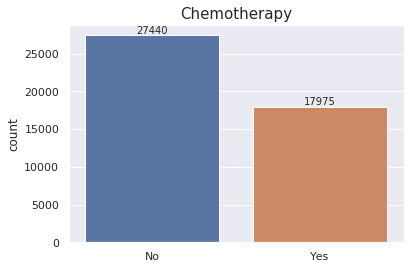

In [87]:
ax = sns.countplot(data=df, x='CHEMOTHERAPY2')
ax.set_title('Chemotherapy', fontsize=15)
ax.set_xlabel('')
ax.set_xticklabels(['No', 'Yes'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 200, height, ha='center')

In [88]:
df['TARGETED2'].value_counts()

0    41236
1     4179
Name: TARGETED2, dtype: int64

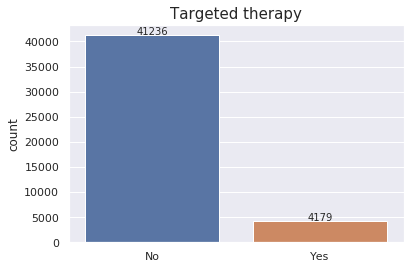

In [89]:
ax = sns.countplot(data=df, x='TARGETED2')
ax.set_title('Targeted therapy', fontsize=15)
ax.set_xlabel('')
ax.set_xticklabels(['No', 'Yes'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 200, height, ha='center')

In [90]:
df['CHEM_TARG2'].value_counts()

0    39894
1     5521
Name: CHEM_TARG2, dtype: int64

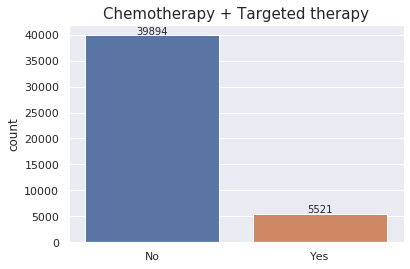

In [91]:
ax = sns.countplot(data=df, x='CHEM_TARG2')
ax.set_title('Chemotherapy + Targeted therapy', fontsize=15)
ax.set_xlabel('')
ax.set_xticklabels(['No', 'Yes'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 200, height, ha='center')

In [92]:
df['CHEM_RADIO2'].value_counts()

0    44622
1      793
Name: CHEM_RADIO2, dtype: int64

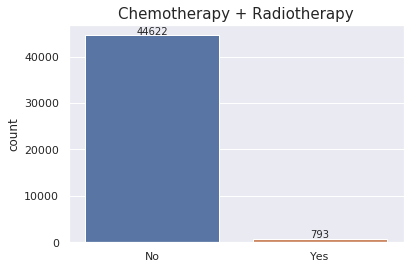

In [93]:
ax = sns.countplot(data=df, x='CHEM_RADIO2')
ax.set_title('Chemotherapy + Radiotherapy', fontsize=15)
ax.set_xlabel('')
ax.set_xticklabels(['No', 'Yes'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 200, height, ha='center')

In [94]:
df['TARG_RADIO2'].value_counts()

0    45403
1       12
Name: TARG_RADIO2, dtype: int64

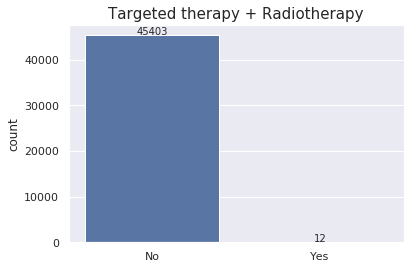

In [95]:
ax = sns.countplot(data=df, x='TARG_RADIO2')
ax.set_title('Targeted therapy + Radiotherapy', fontsize=15)
ax.set_xlabel('')
ax.set_xticklabels(['No', 'Yes'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 200, height, ha='center')

In [96]:
df['HORMONE2'].value_counts()

0    44838
1      577
Name: HORMONE2, dtype: int64

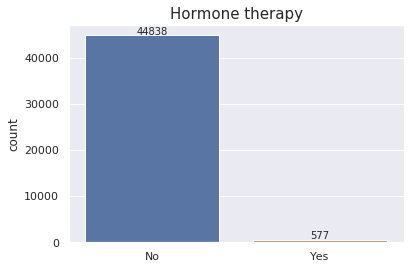

In [97]:
ax = sns.countplot(data=df, x='HORMONE2')
ax.set_title('Hormone therapy', fontsize=15)
ax.set_xlabel('')
ax.set_xticklabels(['No', 'Yes'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 200, height, ha='center')

In [98]:
df['OTHER2'].value_counts()

0    45167
1      248
Name: OTHER2, dtype: int64

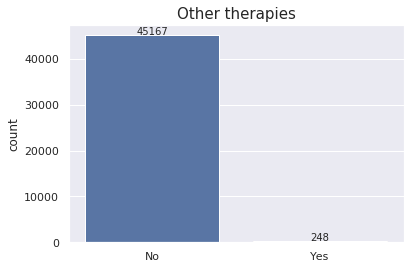

In [99]:
ax = sns.countplot(data=df, x='OTHER2')
ax.set_title('Other therapies', fontsize=15)
ax.set_xlabel('')
ax.set_xticklabels(['No', 'Yes'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 200, height, ha='center')

In [100]:
df = df.drop(['CHEMOTHERAPY', 'TARGETED', 'CHEM_TARG', 'CHEM_RADIO',
       'TARG_RADIO', 'HORMONE', 'OTHER'], axis=1)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,T,N,M,STAGE,GRADE_2,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG,DEPR,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAGNOSISDATEBEST,MERGED_PATIENT_ID_x,LINK_NUMBER,MERGED_TUMOUR_ID,MERGED_REGIMEN_ID,START_DATE_OF_REGIMEN,MERGED_PATIENT_ID_y,BENCHMARK_GROUP,HEIGHT,WEIGHT,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,DIAG_TO_TREAT,DIAG_TO_TREAT_DAYS,DIAG_TO_TREAT_DAYS_MEDIAN,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2
0,10001000,F,810001000,White British,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,0.0,0.0,3.0,2.0,79.0,0,1,0,0,0,0,0,0,0,0,0,2.0,4.0,3.857711,120.0,2013-03-07,10001000.0,810001000.0,10002223.0,10003950.0,2013-03-19,10001000.0,NaN,1.80,67.75,20.910494,0,0,0,0,0,0,0,12 days,12.0,472.5,0,0,0,0,0,0,0,0,0
1,10001000,F,810001000,White British,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,0.0,0.0,3.0,2.0,79.0,0,1,0,0,0,0,0,0,0,0,0,2.0,4.0,3.857711,120.0,2013-03-07,10001000.0,810001000.0,10005351.0,10009879.0,2015-09-26,10001000.0,NaN,1.80,67.75,20.910494,0,0,0,0,0,0,0,933 days,933.0,472.5,0,0,0,0,0,0,0,0,0
2,10001128,F,810001128,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,0.0,0.0,3.0,2.0,86.0,0,0,1,0,0,0,0,0,0,0,0,0.0,1.0,2.234132,0.0,2014-10-23,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1.68,74.00,26.218821,0,0,0,0,0,0,0,NaT,NaN,175.0,0,0,0,0,0,0,0,0,0
3,10001482,F,810001482,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.0,0.0,0.0,3.0,2.0,77.0,1,0,0,0,0,0,0,0,0,1,0,0.0,3.0,3.022649,0.0,2014-01-08,10001482.0,810001482.0,10005354.0,10011398.0,2015-11-23,10001482.0,BORTEZOMIB,1.63,90.15,33.930521,0,0,1,0,0,0,0,684 days,684.0,596.5,0,0,1,1,0,0,0,0,0
4,10001482,F,810001482,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.0,0.0,0.0,3.0,2.0,77.0,1,0,0,0,0,0,0,0,0,1,0,0.0,3.0,3.022649,0.0,2014-01-08,10001482.0,810001482.0,10010150.0,10007977.0,2014-07-18,10001482.0,DOCETAXEL,1.63,90.15,33.930521,0,0,1,0,0,0,0,191 days,191.0,596.5,0,0,1,1,0,0,0,0,0


In [101]:
df[['PATIENTID', 'BENCHMARK_GROUP','CHEMOTHERAPY2', 'TARGETED2', 'CHEM_TARG2', 'CHEM_RADIO2',
       'TARG_RADIO2', 'HORMONE2', 'OTHER2']].dropna().head(10)

,PATIENTID,BENCHMARK_GROUP,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2
3,10001482,BORTEZOMIB,1,1,0,0,0,0,0
4,10001482,DOCETAXEL,1,1,0,0,0,0,0
6,10001482,BENDAMUSTINE,1,1,0,0,0,0,0
14,10003167,LENALIDOMIDE,1,1,0,0,0,0,0
15,10003167,CISPLATIN + VINORELBINE,1,1,0,0,0,0,0
16,10003167,BENDAMUSTINE,1,1,0,0,0,0,0
21,10005842,VISMODEGIB,0,1,0,0,0,0,0
23,10005842,VISMODEGIB,0,1,0,0,0,0,0
24,10006477,ZOLEDRONIC ACID,0,0,0,0,0,0,1
47,10016934,FLUOROURACIL,1,0,0,0,0,0,0


In [102]:
without_treatment = df[(df['CHEMOTHERAPY2']  == 0) & (df['TARGETED2']  == 0) & (df['CHEM_TARG2']  == 0) & 
   (df['CHEM_RADIO2']  == 0) & (df['TARG_RADIO2']  == 0) & (df['HORMONE2']  == 0) & (df['OTHER2']  == 0)]
without_treatment.shape

(26404, 73)

In [103]:
without_treatment['BENCHMARK_GROUP'].value_counts(dropna=False)

NaN    26404
Name: BENCHMARK_GROUP, dtype: int64

In [104]:
df.isna().sum()

PATIENTID                        0
SEX                              0
LINKNUMBER                       0
ETHNICITY                     2663
NEWVITALSTATUS                   0
NUMBER_TUMOURS                   0
C180                             0
C181                             0
C182                             0
C183                             0
C184                             0
C185                             0
C186                             0
C187                             0
C188                             0
BEH_BENIGN                       0
BEH_MALIG                        0
BEH_MICINV                       0
BEH_INSITU                       0
BEH_UNCERT                       0
BEH_MALIG_METAS                  0
BEH_MALIG_UNCERT                 0
T                                0
N                                0
M                                0
STAGE                            0
GRADE_2                          0
AGE_MEDIAN                       0
L0801               

In [105]:
df.shape

(45415, 73)

Now I am going to select the variables that will be needed for the rest of the analysis.

In [106]:
df.columns

Index(['PATIENTID', 'SEX', 'LINKNUMBER', 'ETHNICITY', 'NEWVITALSTATUS',
       'NUMBER_TUMOURS', 'C180', 'C181', 'C182', 'C183', 'C184', 'C185',
       'C186', 'C187', 'C188', 'BEH_BENIGN', 'BEH_MALIG', 'BEH_MICINV',
       'BEH_INSITU', 'BEH_UNCERT', 'BEH_MALIG_METAS', 'BEH_MALIG_UNCERT', 'T',
       'N', 'M', 'STAGE', 'GRADE_2', 'AGE_MEDIAN', 'L0801', 'L1001', 'L1701',
       'L0201', 'L0401', 'L1201', 'L0301', 'L0901', 'CURATIVE_TREAT',
       'NON_CURATIVE_TREAT', 'NO_ACTIVE_TREAT', 'ECOG', 'DEPR',
       'CANCER_YEARS_MEDIAN', 'DIAG_TO_SURG_DAYS_MEDIAN', 'DIAGNOSISDATEBEST',
       'MERGED_PATIENT_ID_x', 'LINK_NUMBER', 'MERGED_TUMOUR_ID',
       'MERGED_REGIMEN_ID', 'START_DATE_OF_REGIMEN', 'MERGED_PATIENT_ID_y',
       'BENCHMARK_GROUP', 'HEIGHT', 'WEIGHT', 'BMI', 'NEOADJUVANT',
       'DIAGNOSTIC', 'PALLIATIVE', 'CURATIVE', 'ADJUVANT', 'DISEASE_MOD',
       'STAGING', 'DIAG_TO_TREAT', 'DIAG_TO_TREAT_DAYS',
       'DIAG_TO_TREAT_DAYS_MEDIAN', 'CT_YES', 'CHEM_RAD_YES', 'CHEMOTHERA

In [107]:
columns_selected = ['PATIENTID', 'SEX', 'ETHNICITY', 'NEWVITALSTATUS',
       'NUMBER_TUMOURS', 'C180', 'C181', 'C182', 'C183', 'C184', 'C185', 'C186', 'C187', 'C188', 
       'BEH_BENIGN', 'BEH_MALIG', 'BEH_MICINV', 'BEH_INSITU','BEH_UNCERT', 'BEH_MALIG_METAS', 'BEH_MALIG_UNCERT',
       'T', 'N', 'M', 'STAGE', 'GRADE_2', 'AGE_MEDIAN', 'L0801', 'L1001',
       'L1701', 'L0201', 'L0401', 'L1201', 'L0301', 'L0901', 
       'CURATIVE_TREAT', 'NON_CURATIVE_TREAT', 'NO_ACTIVE_TREAT', 
       'ECOG', 'DEPR', 'CANCER_YEARS_MEDIAN', 'DIAG_TO_SURG_DAYS_MEDIAN', 'DIAG_TO_TREAT_DAYS_MEDIAN', 'BMI',
       'NEOADJUVANT', 'DIAGNOSTIC', 'PALLIATIVE', 'CURATIVE', 'ADJUVANT', 'DISEASE_MOD', 'STAGING', 
       'CT_YES', 'CHEM_RAD_YES', 'CHEMOTHERAPY2', 'TARGETED2', 'CHEM_TARG2', 'CHEM_RADIO2', 
       'TARG_RADIO2', 'HORMONE2', 'OTHER2']

In [108]:
df = df[columns_selected]
df.head()

,PATIENTID,SEX,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,T,N,M,STAGE,GRADE_2,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG,DEPR,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2
0,10001000,F,White British,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,0.0,0.0,3.0,2.0,79.0,0,1,0,0,0,0,0,0,0,0,0,2.0,4.0,3.857711,120.0,472.5,20.910494,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10001000,F,White British,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,0.0,0.0,3.0,2.0,79.0,0,1,0,0,0,0,0,0,0,0,0,2.0,4.0,3.857711,120.0,472.5,20.910494,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10001128,F,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,0.0,0.0,3.0,2.0,86.0,0,0,1,0,0,0,0,0,0,0,0,0.0,1.0,2.234132,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10001482,F,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.0,0.0,0.0,3.0,2.0,77.0,1,0,0,0,0,0,0,0,0,1,0,0.0,3.0,3.022649,0.0,596.5,33.930521,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
4,10001482,F,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.0,0.0,0.0,3.0,2.0,77.0,1,0,0,0,0,0,0,0,0,1,0,0.0,3.0,3.022649,0.0,596.5,33.930521,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0


In [109]:
df.shape

(45415, 60)

Finally, I am going to remove the duplicate entries.

In [110]:
df = df.drop_duplicates()
df.shape

(33690, 60)

In [111]:
df[df.groupby('PATIENTID')['PATIENTID'].transform('size') > 1].sort_values(by='PATIENTID').head()

,PATIENTID,SEX,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,T,N,M,STAGE,GRADE_2,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG,DEPR,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2


As we can see, all the information of each patient is contained in a single row.

In [112]:
df.isna().sum()

PATIENTID                       0
SEX                             0
ETHNICITY                    1960
NEWVITALSTATUS                  0
NUMBER_TUMOURS                  0
C180                            0
C181                            0
C182                            0
C183                            0
C184                            0
C185                            0
C186                            0
C187                            0
C188                            0
BEH_BENIGN                      0
BEH_MALIG                       0
BEH_MICINV                      0
BEH_INSITU                      0
BEH_UNCERT                      0
BEH_MALIG_METAS                 0
BEH_MALIG_UNCERT                0
T                               0
N                               0
M                               0
STAGE                           0
GRADE_2                         0
AGE_MEDIAN                      0
L0801                           0
L1001                           0
L1701         

Finally, I am going to save this data frame in a new pickle file.

In [113]:
df.to_pickle('./Data/avpat_avtum_sactpat_sacttum_sactreg.pickle')